In [1]:
!pip install qiskit --quiet
!pip install qiskit-aer --quiet

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_city, plot_histogram
from qiskit_aer import AerSimulator
import numpy as np

|0> Statevectors after applying Hadamard: [0.70710678+0.j 0.70710678+0.j]


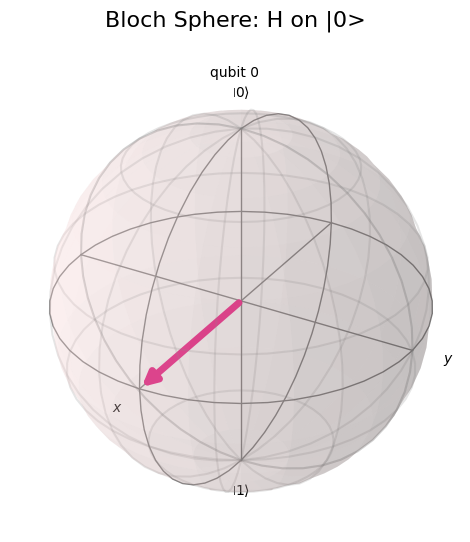

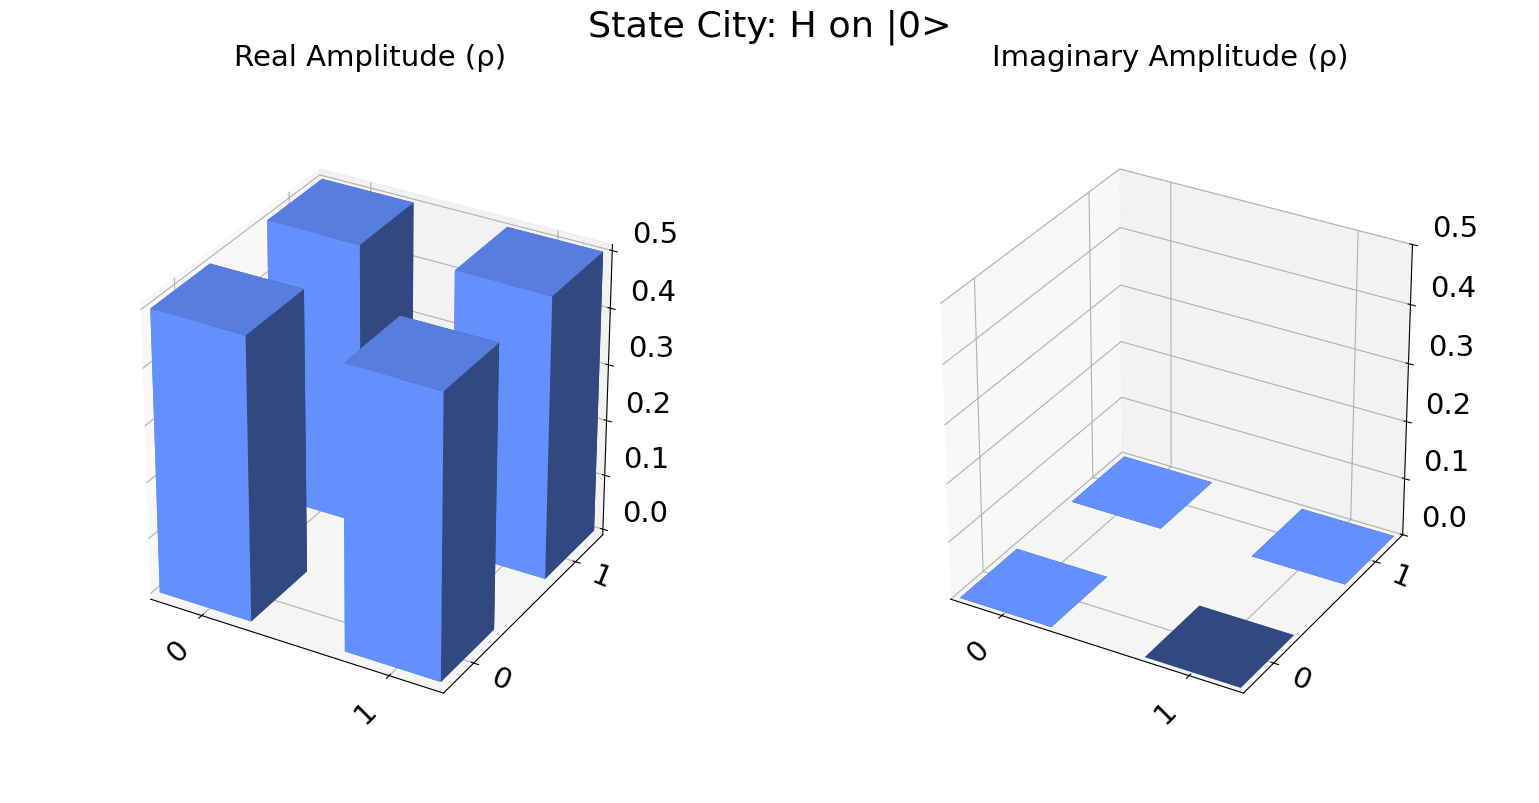

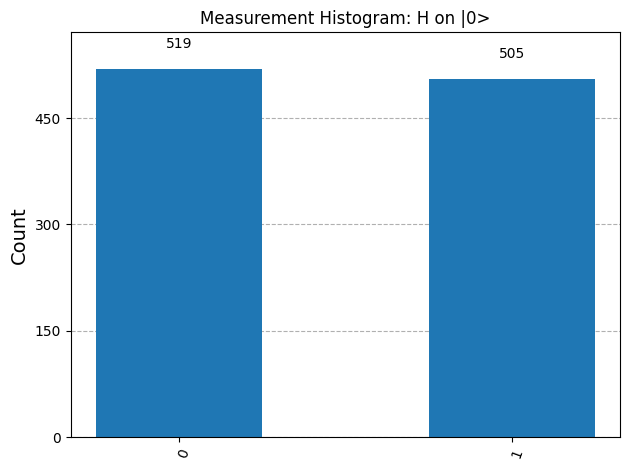



|1> Statevectors after applying Hadamard: [ 0.70710678+0.j -0.70710678+0.j]


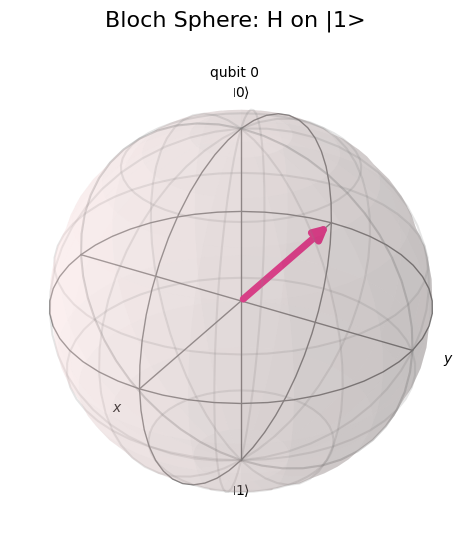

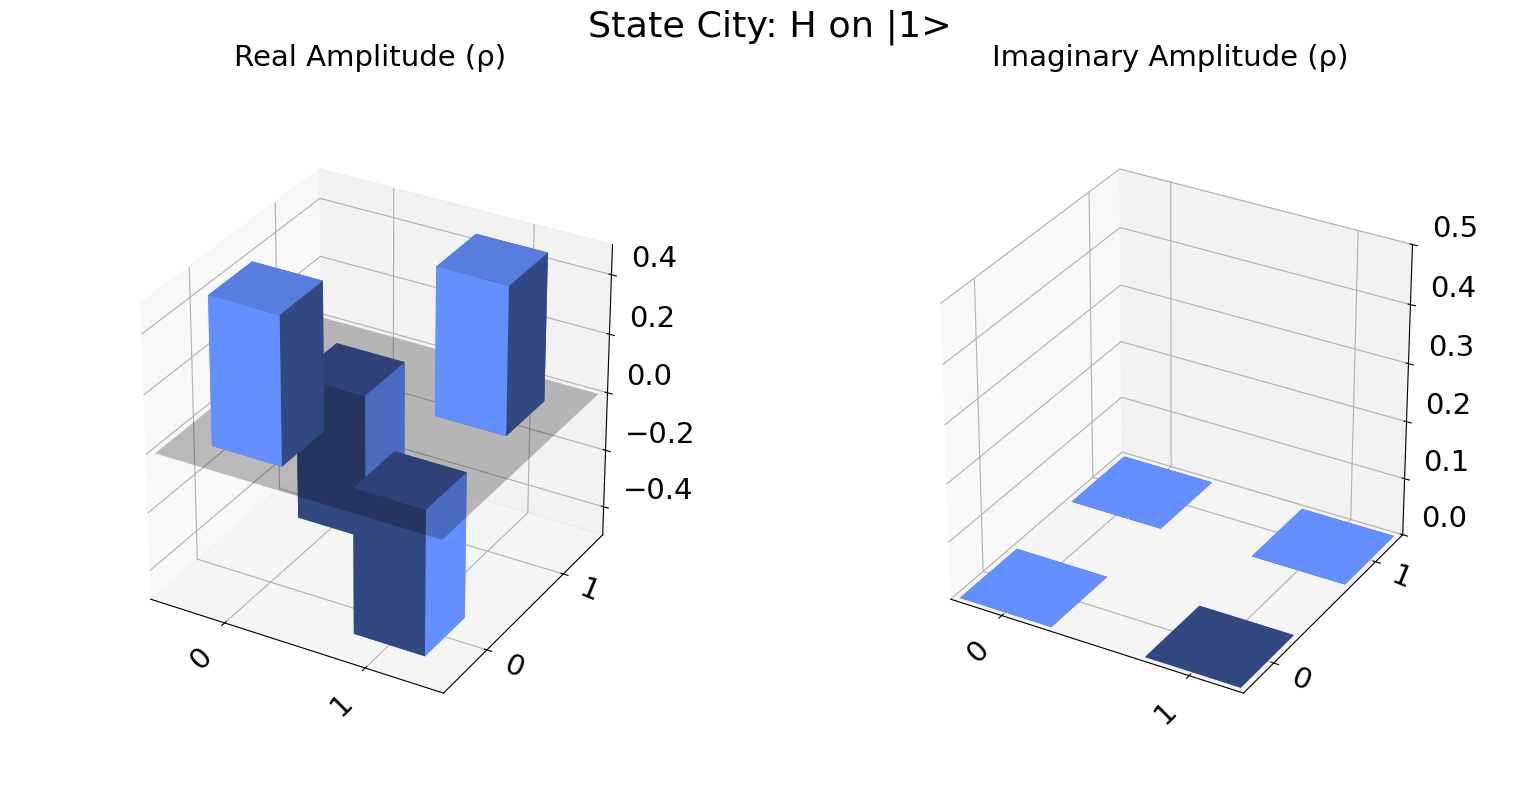

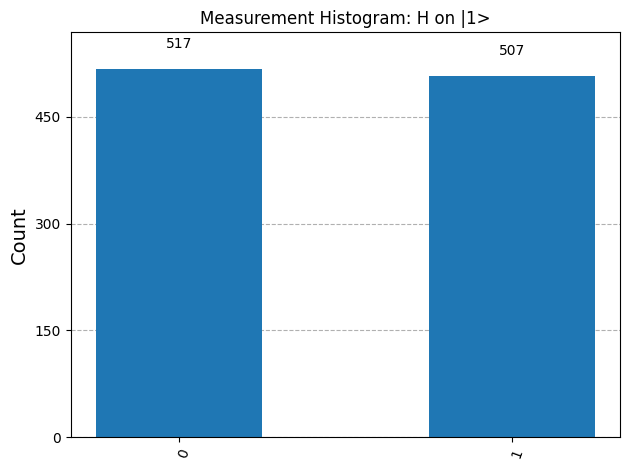



|+> Statevectors after applying Hadamard: [1.+0.j 0.+0.j]


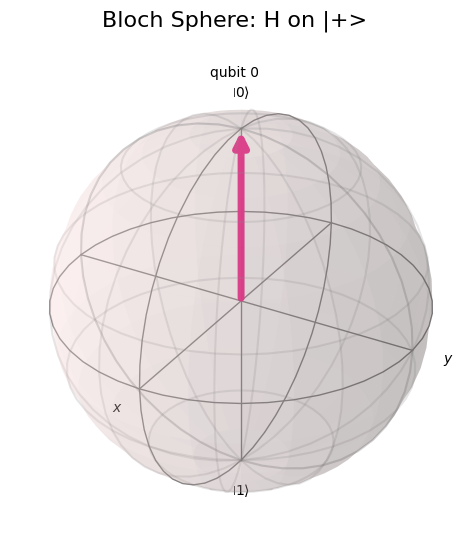

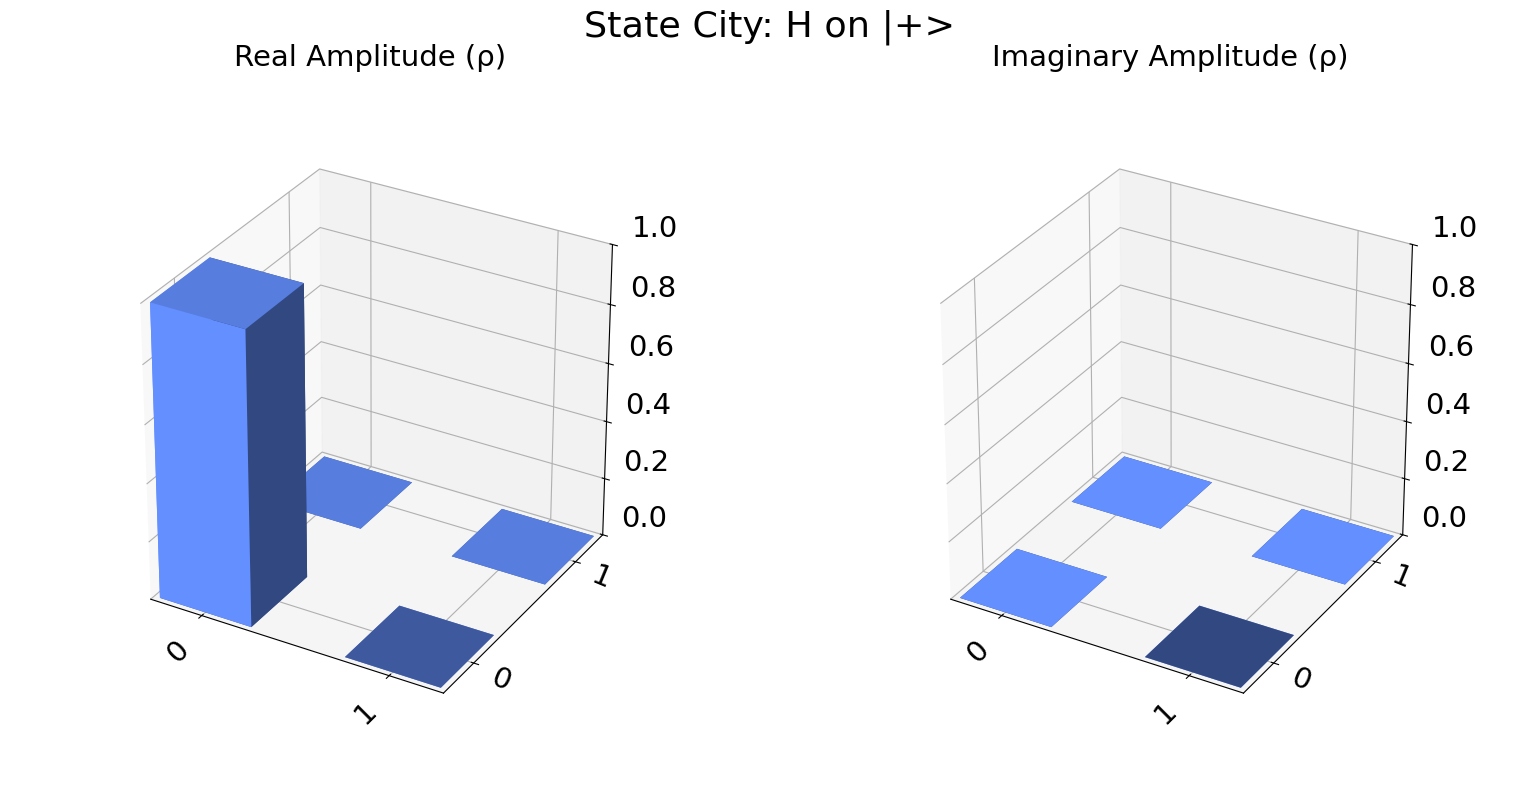

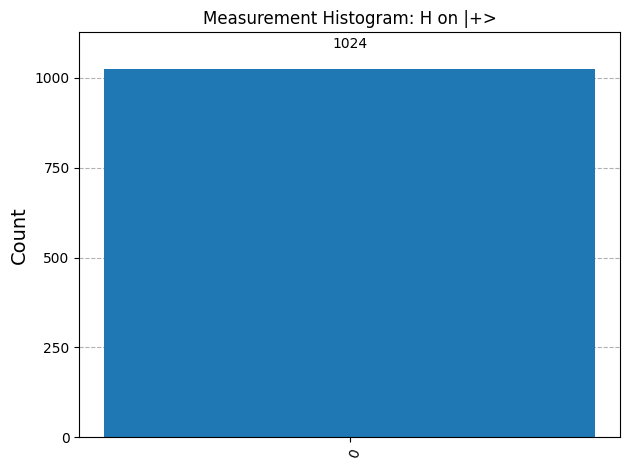



|-> Statevectors after applying Hadamard: [0.+0.j 1.+0.j]


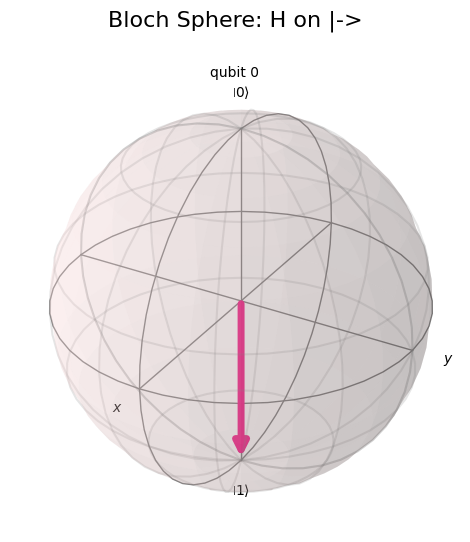

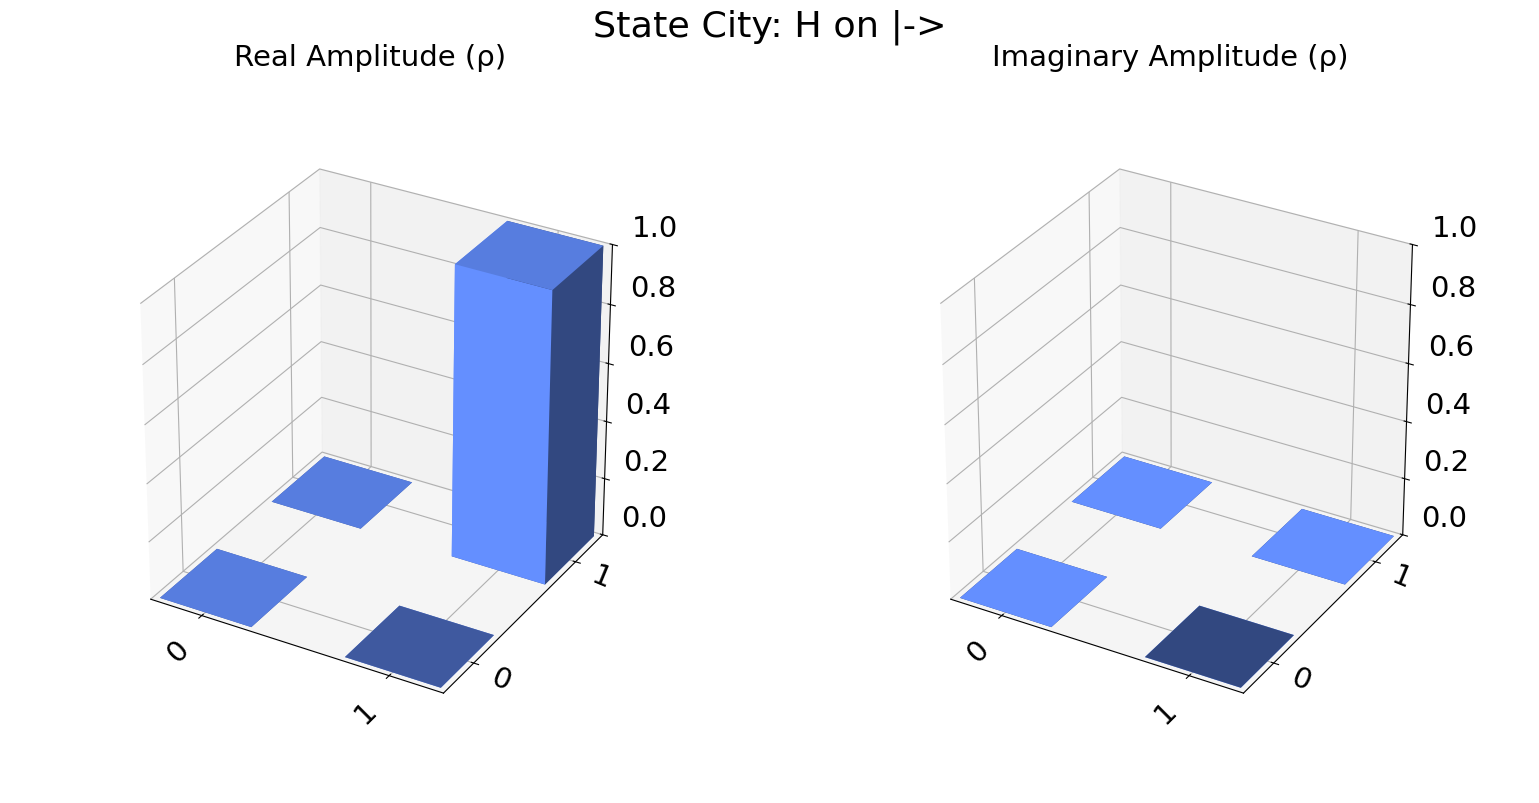

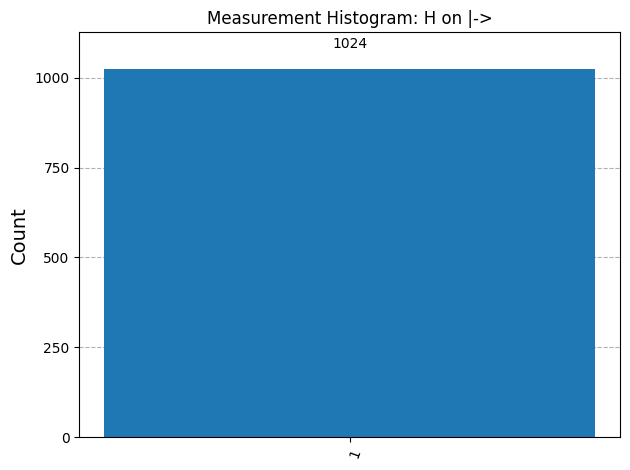

In [13]:
# First Task - Predict the statevector after H on |0> |1> |+> |->

def visualize_hadamard_statevector(initial_state_vector, label):
    qc = QuantumCircuit(1, 1)
    qc.initialize(initial_state_vector, 0)
    qc.h(0)
    qc.measure(0, 0)

    qc_state = QuantumCircuit(1)
    qc_state.initialize(initial_state_vector, 0)
    qc_state.h(0)
    sv_after = Statevector.from_instruction(qc_state)

    print(label, "Statevectors after applying Hadamard:", sv_after.data)

    display(plot_bloch_multivector(sv_after, title=f"Bloch Sphere: H on {label}"))
    display(plot_state_city(sv_after, title=f"State City: H on {label}"))

    sim = AerSimulator()
    qc_t = transpile(qc, sim)
    result = sim.run(qc_t, shots=1024).result()
    counts = result.get_counts()
    display(plot_histogram(counts, title=f"Measurement Histogram: H on {label}"))
    print("\n")


visualize_hadamard_statevector(np.array([1, 0]), "|0>")
visualize_hadamard_statevector(np.array([0, 1]), "|1>")
visualize_hadamard_statevector(np.array([1/np.sqrt(2), 1/np.sqrt(2)]), "|+>")
visualize_hadamard_statevector(np.array([1/np.sqrt(2), -1/np.sqrt(2)]), "|->")


Statevector for H⊗H⊗H |000> : [0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]


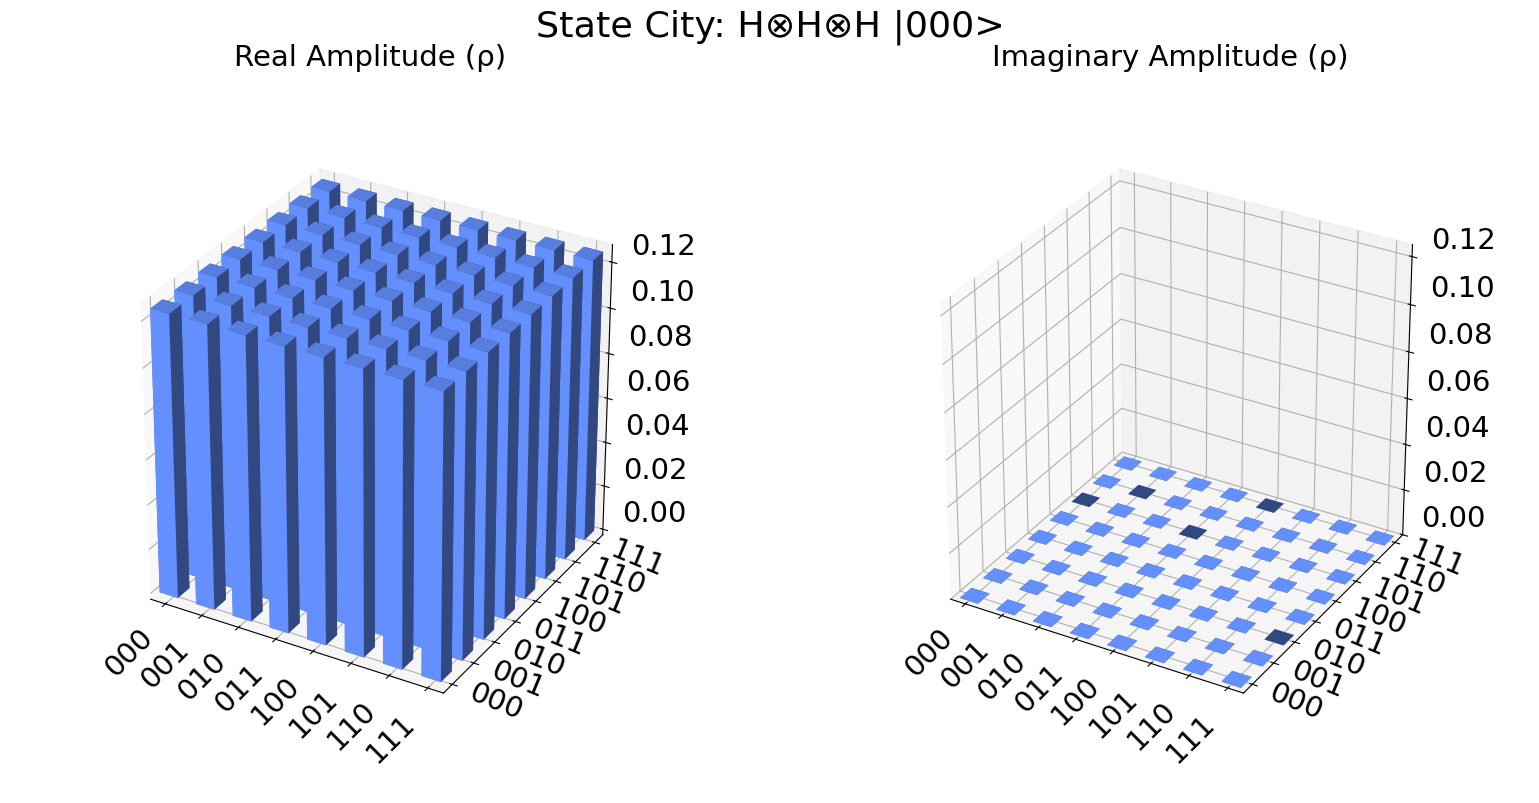

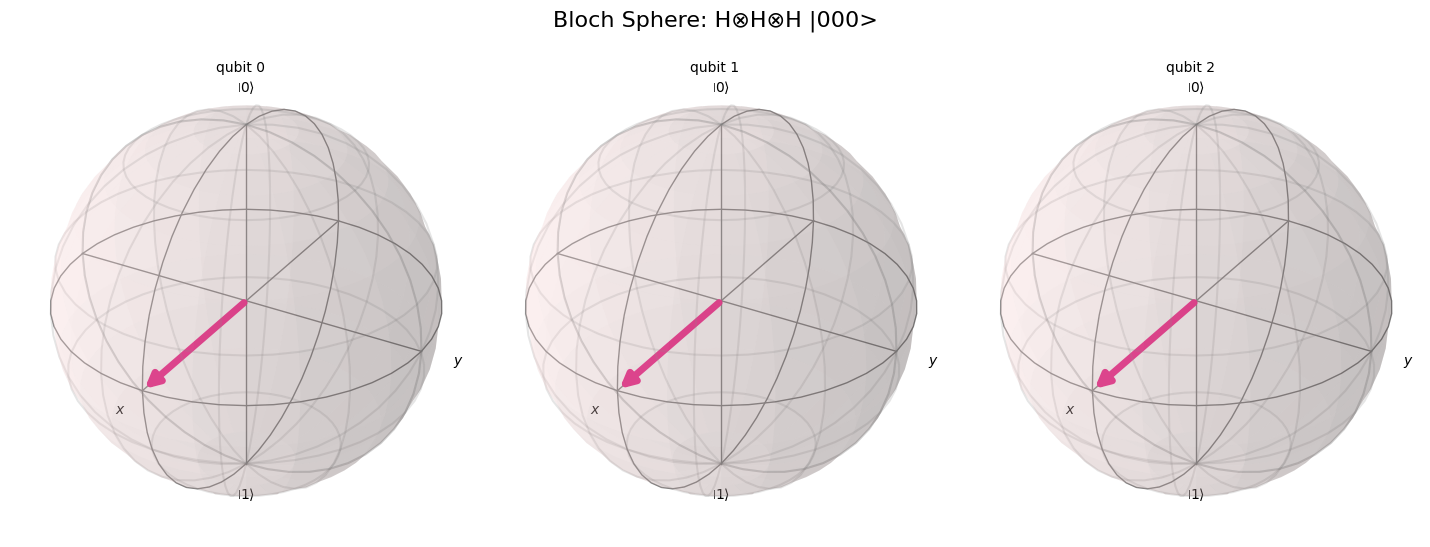

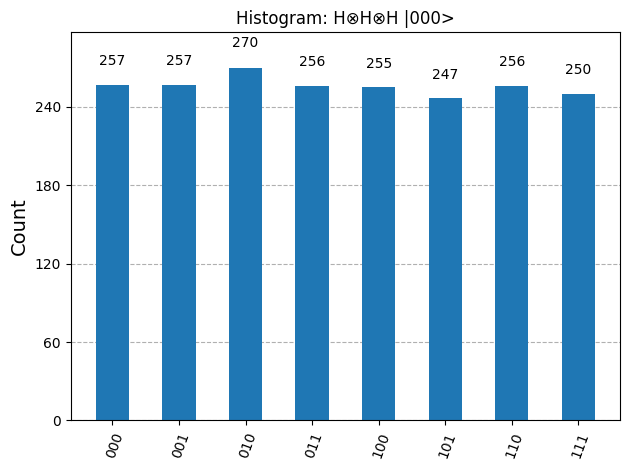

In [16]:
# Task 2: 3-qubit system with H⊗H⊗H and visualization

qc3 = QuantumCircuit(3, 3)
qc3.h([0, 1, 2])
qc3.measure([0,1,2],[0,1,2])

qc_h3 = QuantumCircuit(3)
qc_h3.h([0, 1, 2])
sv3 = Statevector.from_instruction(qc_h3)
print("\nStatevector for H⊗H⊗H |000> :",sv3.data)

display(plot_state_city(sv3, title="State City: H⊗H⊗H |000>"))
display(plot_bloch_multivector(sv3, title="Bloch Sphere: H⊗H⊗H |000>"))

res = sim.run(transpile(qc3, sim), shots=2048).result()
display(plot_histogram(res.get_counts(), title="Histogram: H⊗H⊗H |000>"))

Statevector for GHZ : [0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


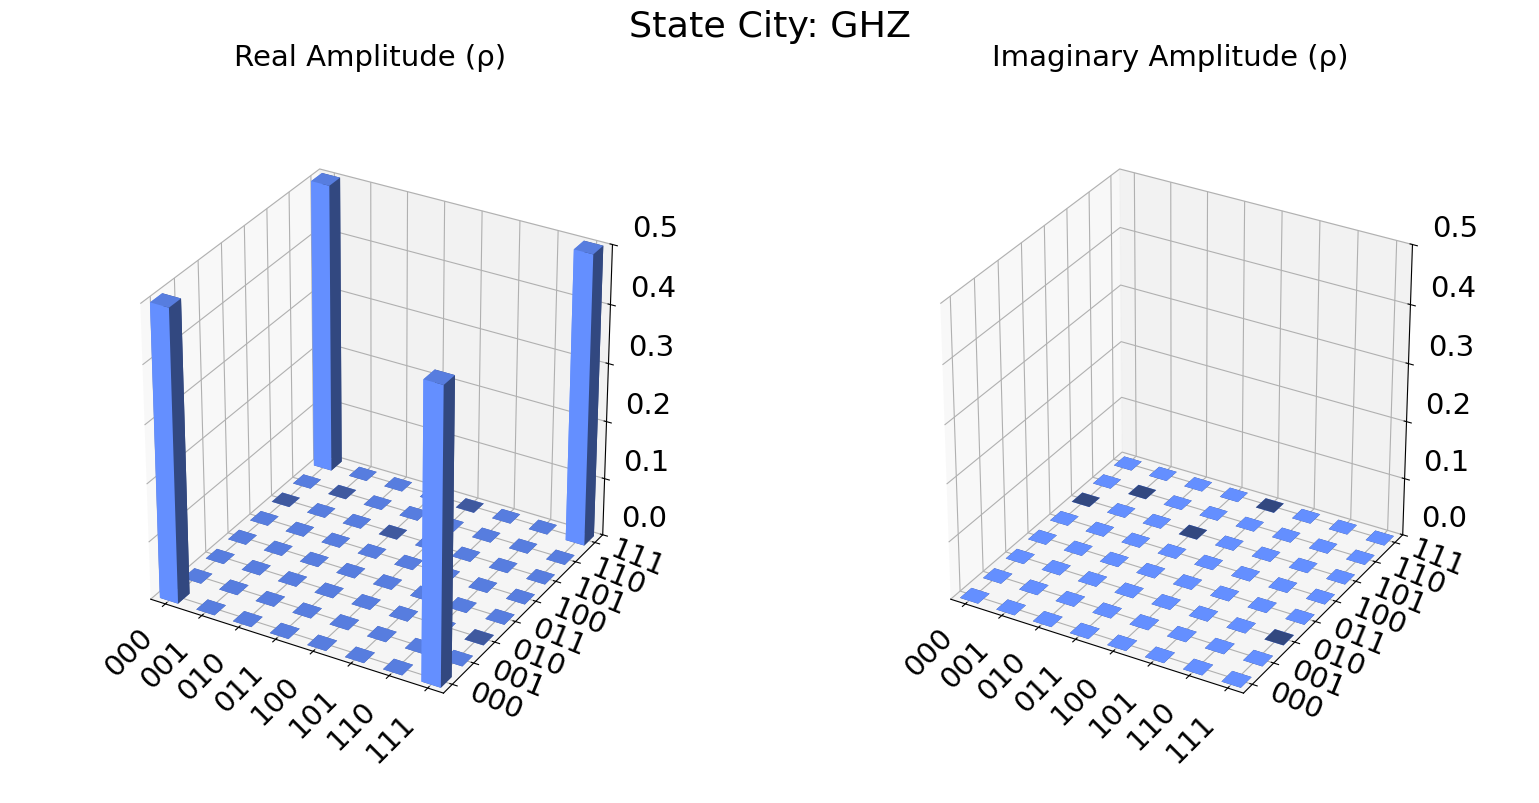

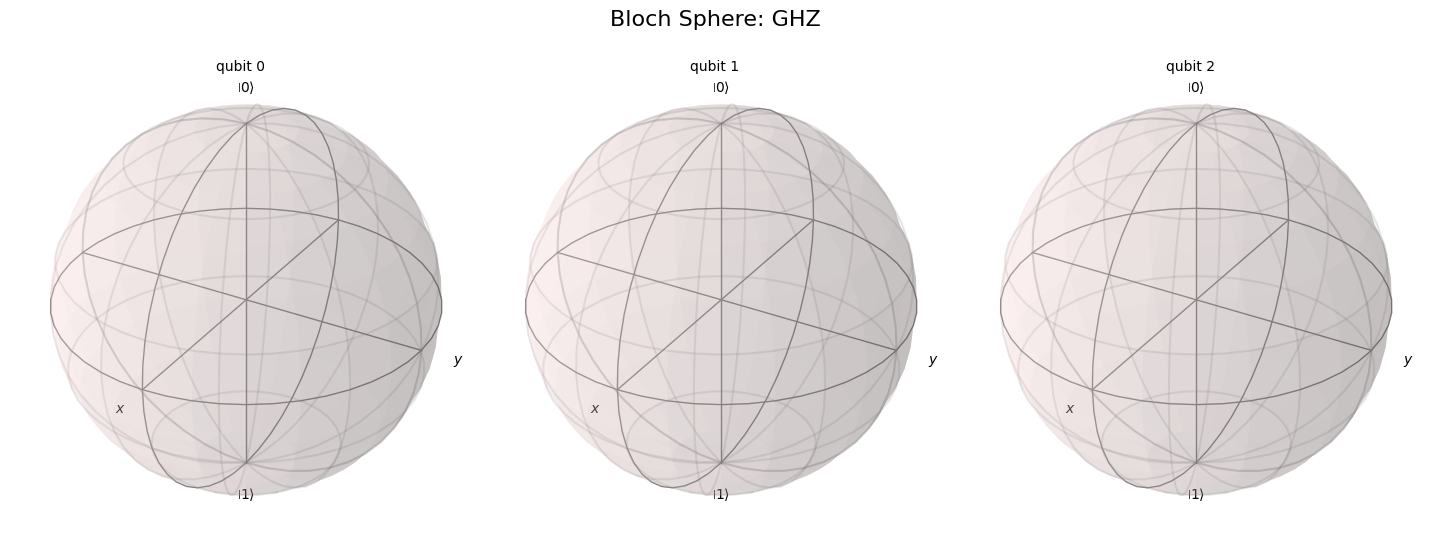

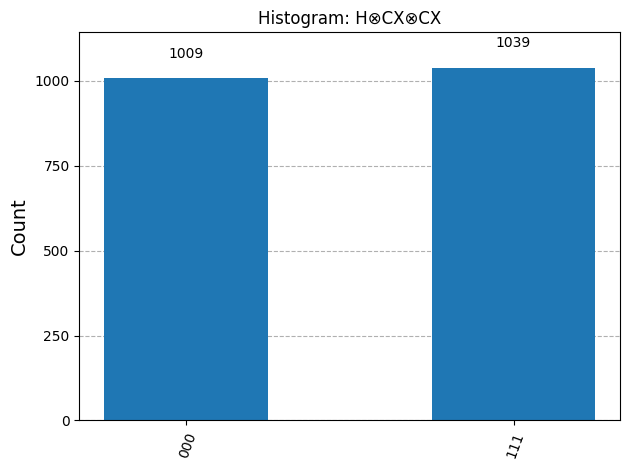

In [17]:
#Third task - Apply H + CX + CX on 3 qubits and analyze correlations

qc = QuantumCircuit(3, 3)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.measure([0, 1, 2], [0, 1, 2])

ghz = QuantumCircuit(3)
ghz.h(0)
ghz.cx(0, 1)
ghz.cx(0, 2)

sv_ghz = Statevector.from_instruction(ghz)
print("Statevector for GHZ :", sv_ghz.data)

display(plot_state_city(sv_ghz,title="State City: GHZ"))
display(plot_bloch_multivector(sv_ghz, title="Bloch Sphere: GHZ"))

res = sim.run(transpile(qc, sim), shots=2048).result()
display(plot_histogram(res.get_counts(), title="Histogram: H⊗CX⊗CX"))

Final statevector after H twice on |1> : [0.+0.j 1.+0.j]


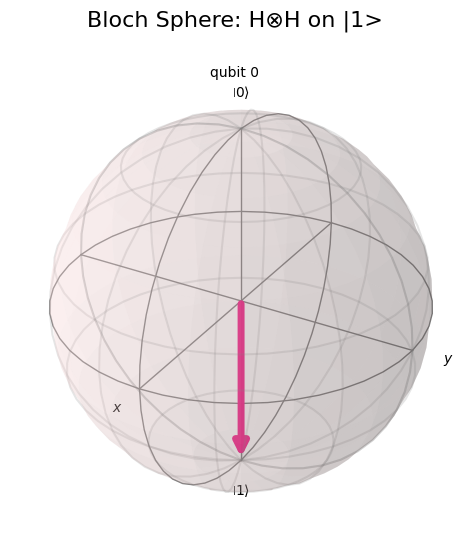

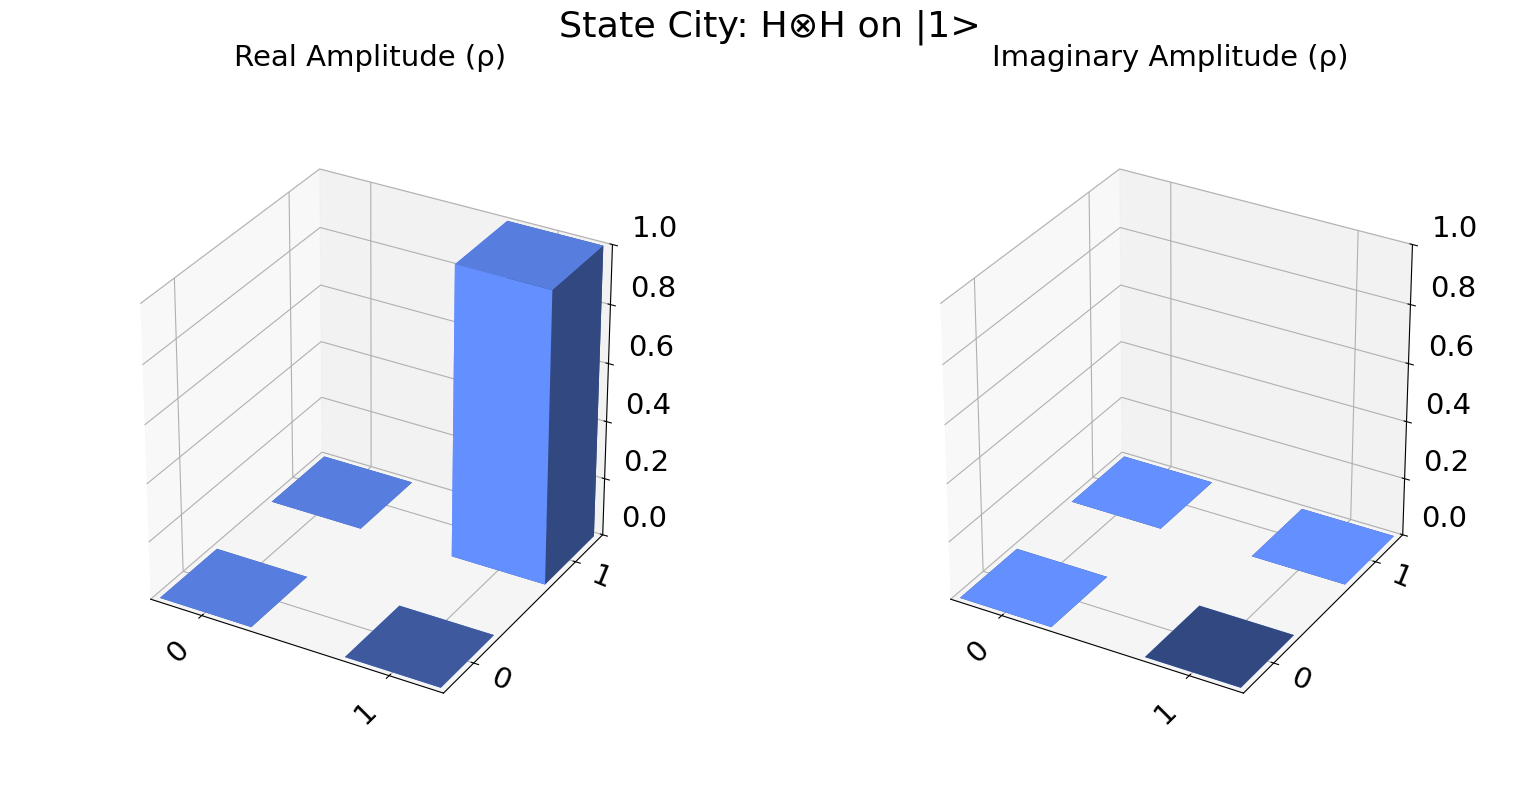

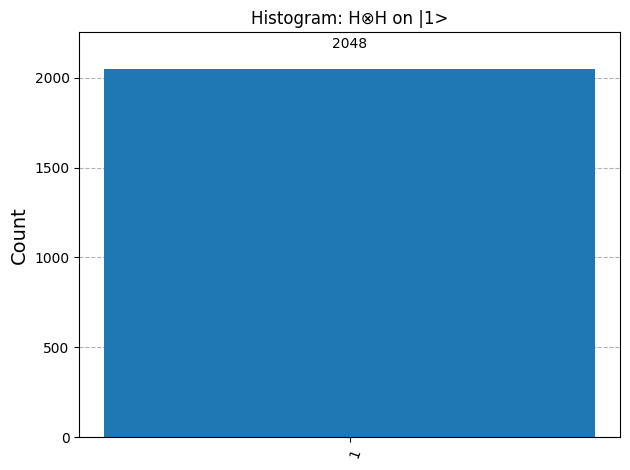

In [23]:
# Fourth task - Apply H twice on |1> and verify the original state.

qc4 = QuantumCircuit(1,1)
qc4.initialize([0,1],0)
qc4.h(0)
qc4.h(0)
qc4.measure(0,0)

qc_state = QuantumCircuit(1)
qc_state.initialize([0,1],0)
qc_state.h(0)
qc_state.h(0)
sv4 = Statevector.from_instruction(qc_state)
print("Final statevector after H twice on |1> :", sv4.data)

display(plot_bloch_multivector(sv4, title="Bloch Sphere: H⊗H on |1>"))
display(plot_state_city(sv4, title="State City: H⊗H on |1>"))

res = sim.run(transpile(qc4, sim), shots=2048).result()
display(plot_histogram(res.get_counts(), title="Histogram: H⊗H on |1>"))

|0> before:  [1.+0.j 0.+0.j]  after H:  [0.70710678+0.j 0.70710678+0.j]


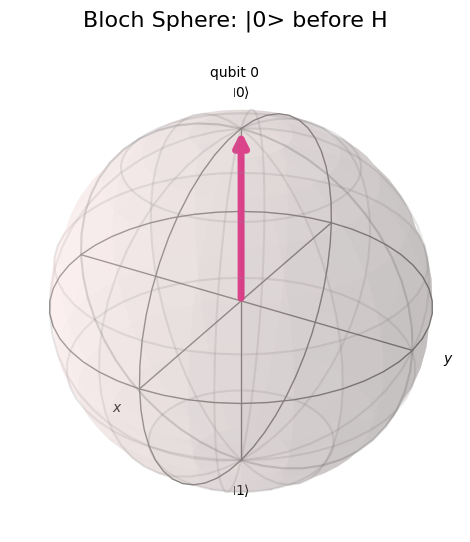

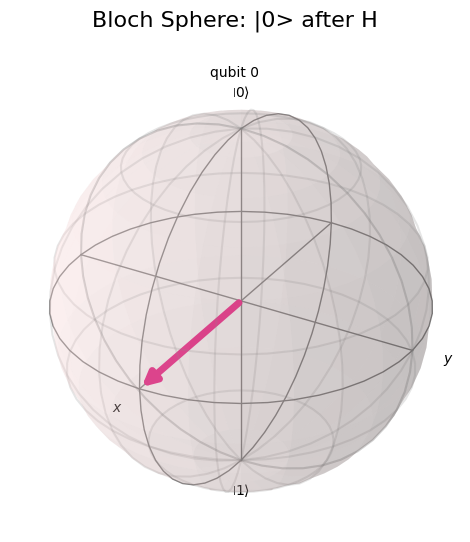

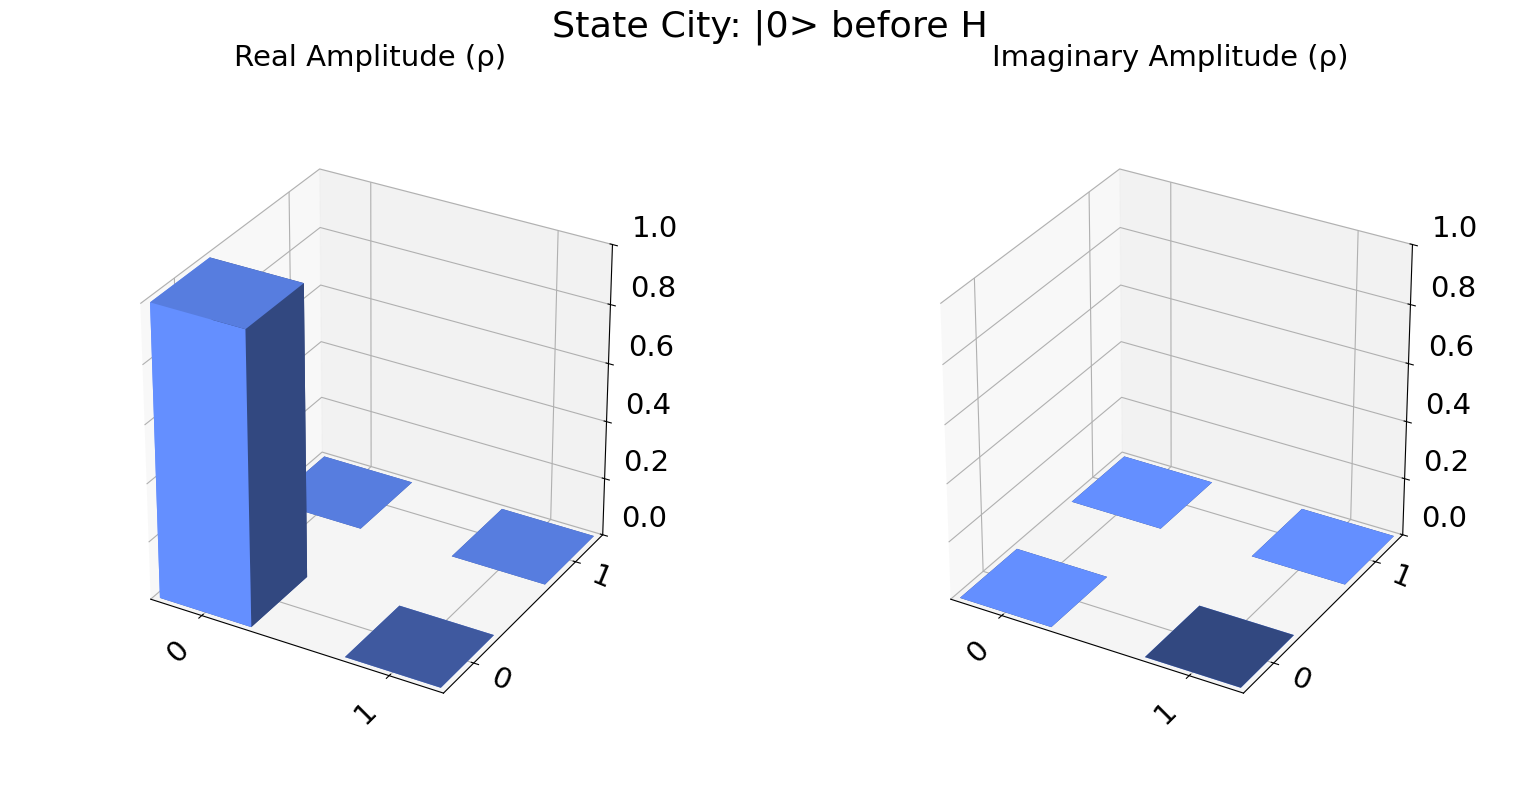

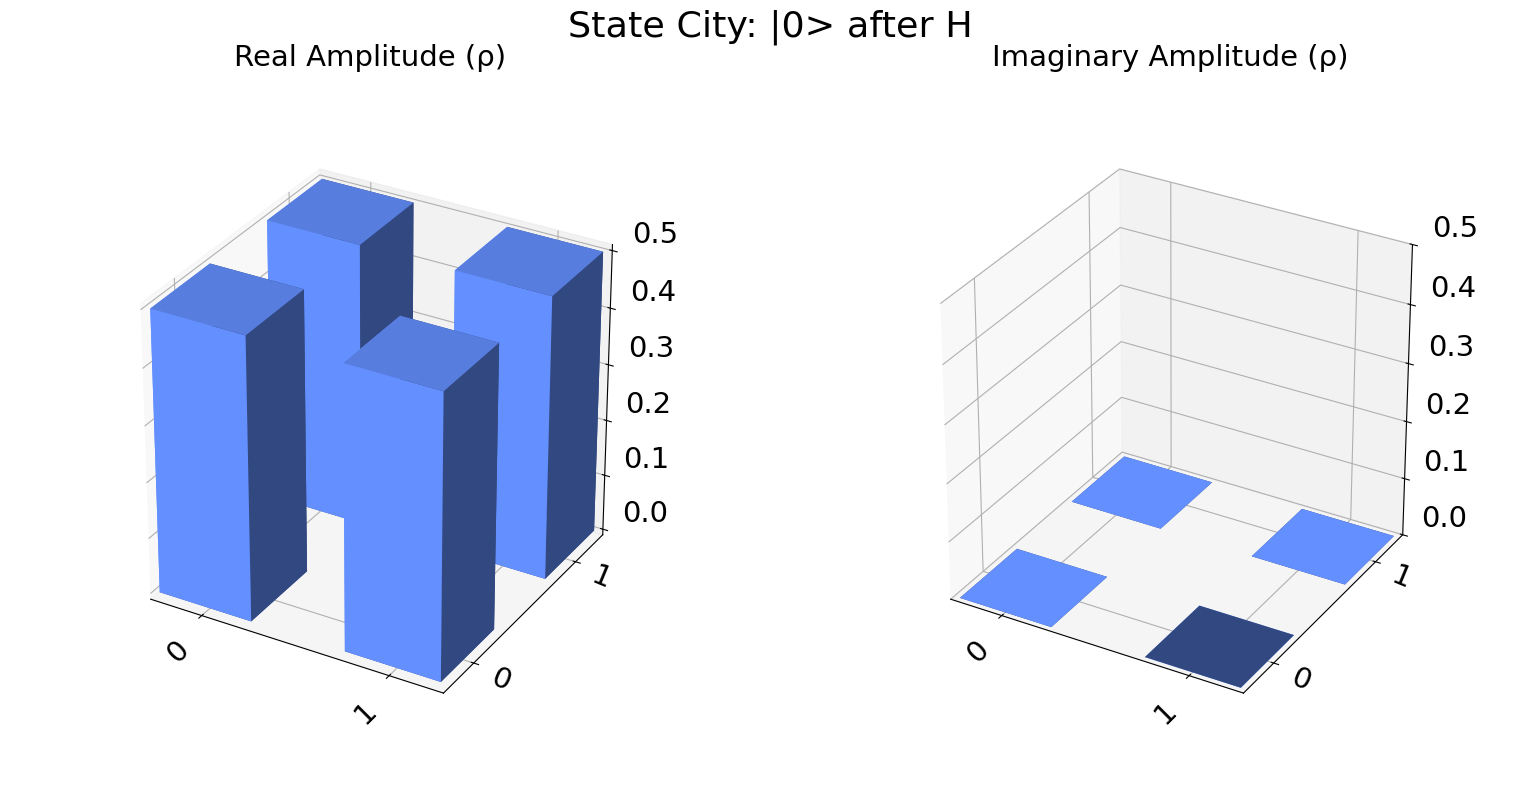

|1> before:  [0.+0.j 1.+0.j]  after H:  [ 0.70710678+0.j -0.70710678+0.j]


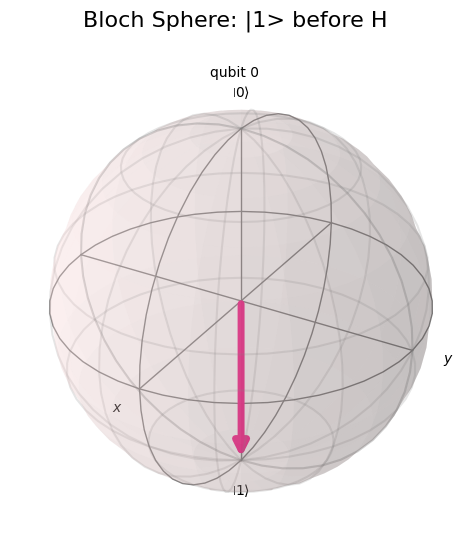

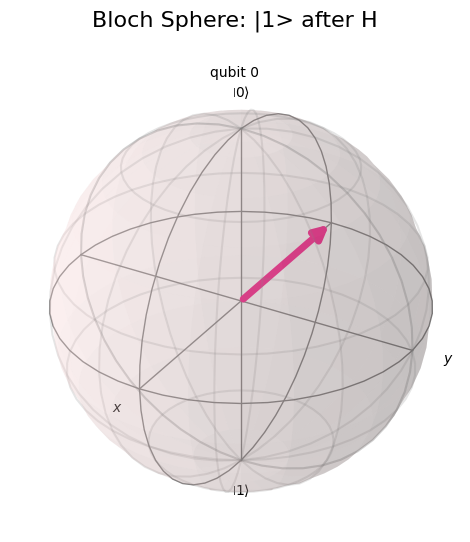

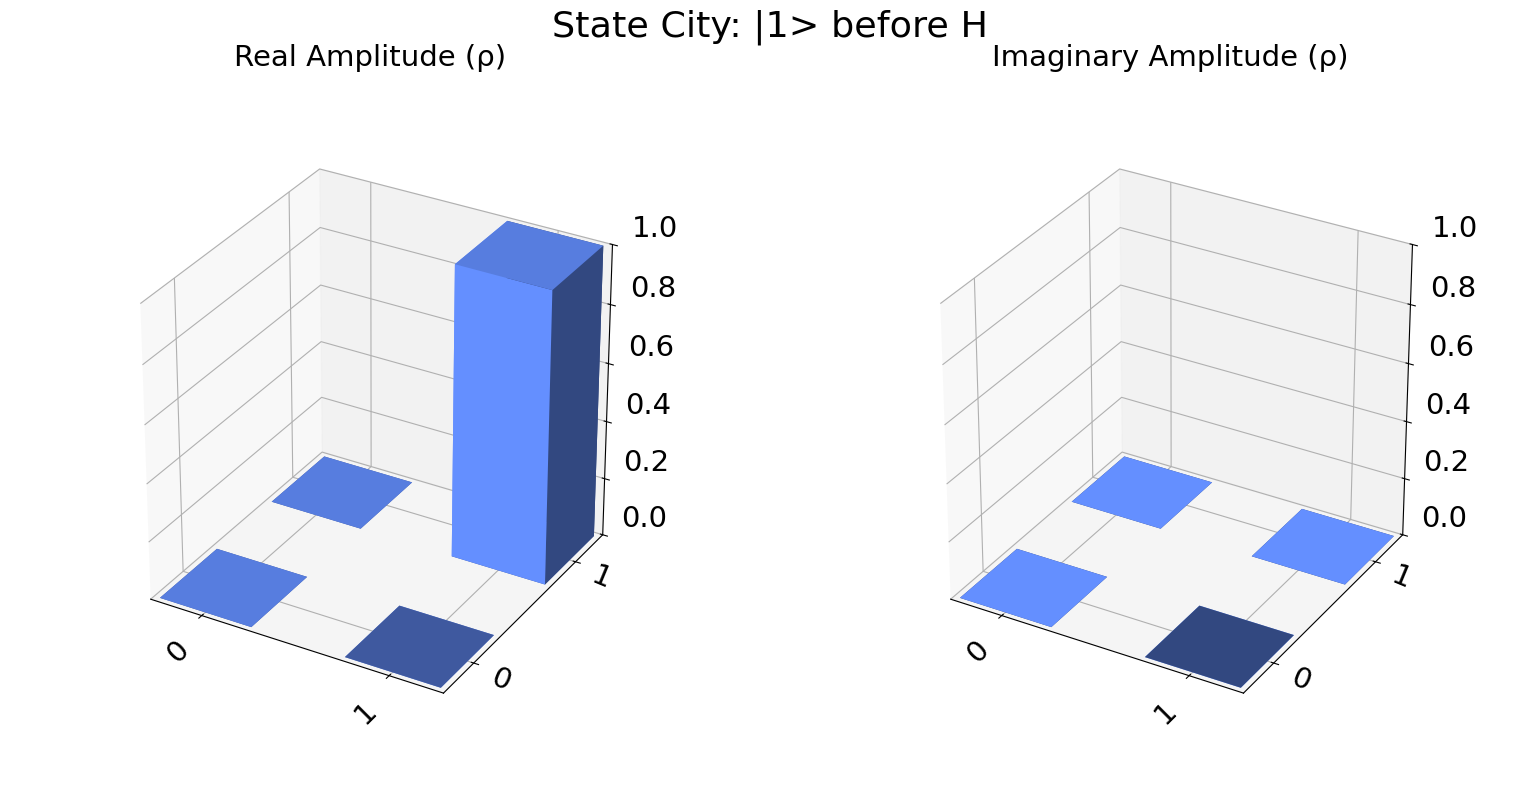

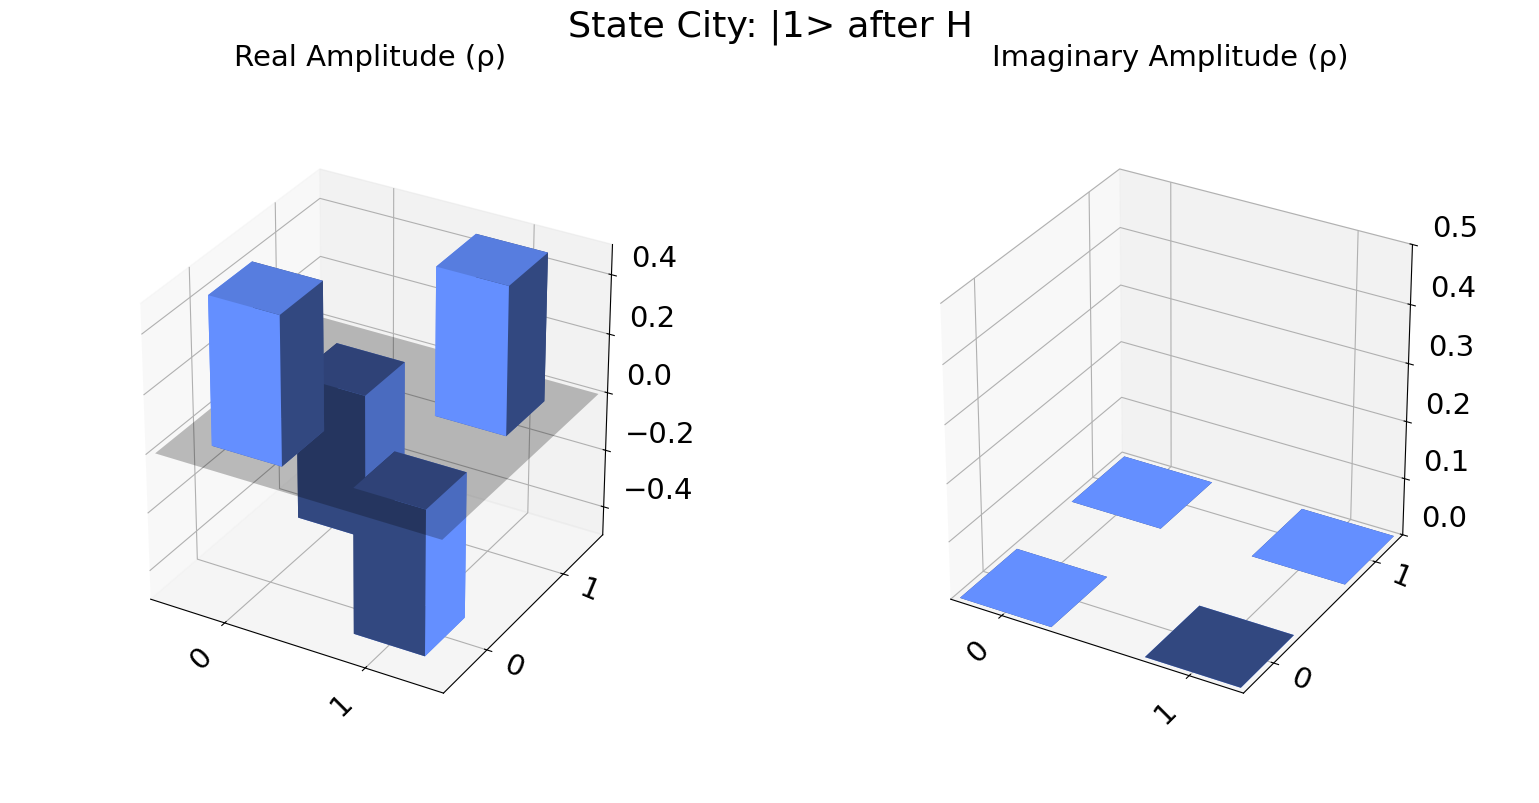

In [25]:
#Fifth task - Use Bloch sphere plots to observe qubit rotations after Hadamard.

def bloch_before_and_after(initial_state_vector, label):
    sv0= Statevector(initial_state_vector)
    qc = QuantumCircuit(1, 1)
    qc.initialize(initial_state_vector, 0)
    qc.h(0)
    sv1 = Statevector.from_instruction(qc)
    print(f"{label} before: ", sv0.data, " after H: ", sv1.data)

    display(plot_bloch_multivector(sv0, title=f"Bloch Sphere: {label} before H"))
    display(plot_bloch_multivector(sv1, title=f"Bloch Sphere: {label} after H"))
    display(plot_state_city(sv0, title=f"State City: {label} before H"))
    display(plot_state_city(sv1, title=f"State City: {label} after H"))


bloch_before_and_after(np.array([1, 0]), "|0>")
bloch_before_and_after(np.array([0, 1]), "|1>")